#Эквализация изображения

Другой популярной процедурой адаптивной гистограммной обработки изображения является *эквализация* изображения. Эквализация также отображает реальный яркостный диапазон данного изображения (от минимального до максимального значения интенсивности) на диапазон [0, 255]. При этом обеспечивается "выравнивание" числа пикселов изображения, имеющих различные значения яркости. Математическая форма данного преобразования имеет вид
$$
{\rm LUT}[i] = 255 \cdot  \frac{\sum\limits_{j=1}^i \textrm{Hist}[j]} {\sum\limits_{j=1}^{255} \textrm{Hist}[j]},
$$
В тех случаях, когда в диапазоне [Imin,Imax] более или менее равномерно присутствуют все градации, визуальный эффект от эквализации трудно отличить от эффекта нормализации. Однако в случае, когда значительная часть градаций яркости отсутствует, эквализация позволяет более равномерно использовать диапазон [0,255] для более контрастного отображения присутствующих на изображении градаций. Визуально это выглядит как "проявление" большего количества ранее не заметных на изображении деталей и контуров.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


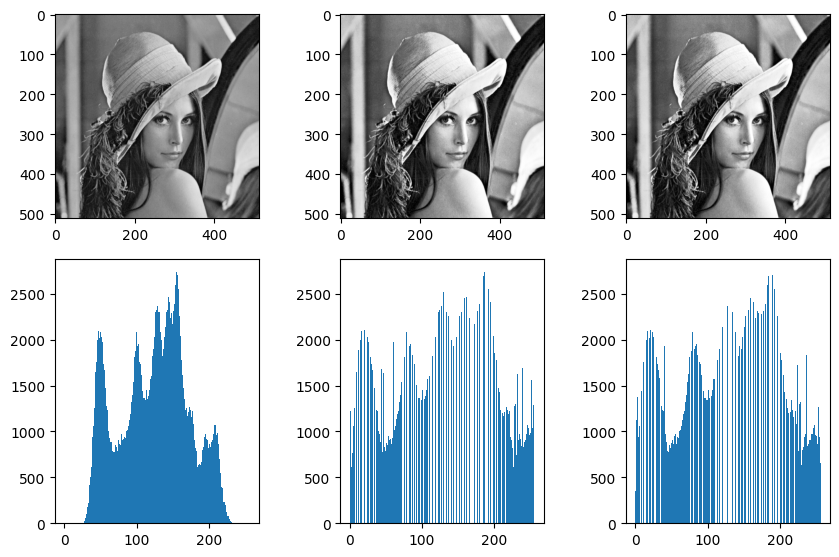

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

image1 = cv.imread('/content/drive/My Drive/Colab_Notebooks/COI/lb2/lenna.png')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

def lut_eq(img):
    res = np.array(np.unique(img, return_counts=True)).T
    histogram_sum = sum(res[:, 1])

    lut = np.zeros(256, dtype=np.float32)
    cumulativeSum = np.cumsum(res[:, 1])

    for i in range(res.shape[0]):
        val = int(res[i, 0])
        lut[val] = 255 * cumulativeSum[i] / histogram_sum

    copy = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixelValue = img[i, j]
            copy[i, j] = lut[pixelValue]

    return copy

result_image_2 = lut_eq(gray_image1)

cv_result_image = cv.equalizeHist(gray_image1)


plt.figure(figsize=(10, 7))

plt.subplot(231)
plt.imshow(gray_image1, cmap='gray')

plt.subplot(232)
plt.imshow(result_image_2, cmap='gray')

plt.subplot(233)
plt.imshow(cv_result_image, cmap='gray')

plt.subplot(234)
plt.hist(gray_image1.reshape(-1), 256, (0, 256))

plt.subplot(235)
plt.hist(result_image_2.reshape(-1), 256, (0, 256))

plt.subplot(236)
plt.hist(cv_result_image.reshape(-1), 256, (0, 256))

plt.subplots_adjust(wspace=0.4, hspace=0.04)

plt.show()